In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def drop_sparse(df, threshold):
    for col in df.columns:
        if df[col].count() < threshold:
            df.drop(col, axis=1, inplace=True)
    return None

def one_hot_encoding(df, columns):
    df = df.copy()
    for col, pref in columns.items():
        dummy = pd.get_dummies(df[col], prefix=pref)
        dummy.astype(bool)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(col, axis=1)
    return df

def time_parser_ms(t):
    try:
        t = parser.parse(t)
        t = t.time().minute*60*1000 + t.time().second*1000 + t.time().microsecond/10000
        t = int(t)
    except:
        t = np.nan
    return t

def convert_time_ms(df,time_cols):
    for col in time_cols:
        df[col] = df[col].apply(time_parser_ms)
    return None

In [4]:
horses = pd.read_csv('./raw_data/horses2.csv')

In [5]:
horses = horses.drop(['RaceNumber','RaceName','RaceTitle','Place','HorseName','Trainer', 'Driver', 'Venue', 'DayCalender', 'HorseID',  'Placer','Colour', 'Sire', 'NumberTrainer', 'tracknamelaststart', 'TrainerLastStart',	'DriverLastStart',	'StewardsFull', 'racetime', 'Timelastrace',  'Tracklaststart','StewardsComments', 'Prizemoney' ], axis=1)

Text(0.5, 1.0, 'Age')

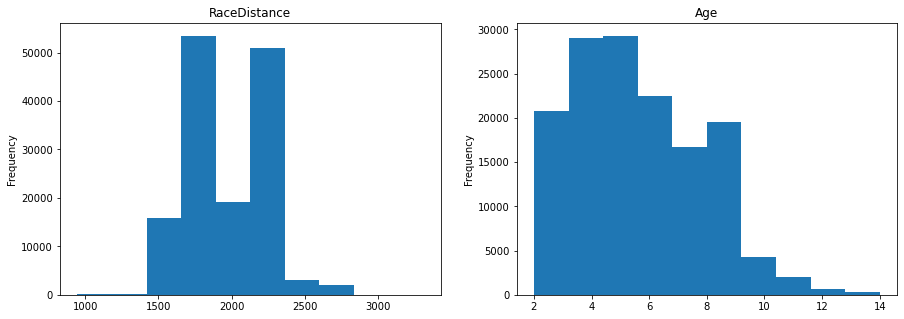

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
horses['RaceDistance'].plot.hist(ax=ax[0], bins=10)
ax[0].set_title('RaceDistance')
horses['Age'].plot.hist(ax=ax[1], bins=10)
ax[1].set_title('Age')

In [7]:
drop_sparse(horses, 10)
convert_time_ms(horses, ['BestWinningMile'])
horses = one_hot_encoding(horses, {'Row':'Row_','Sex': 'Sex_'})

In [8]:
mean = horses.median()
horses.fillna(mean, inplace=True)
horses.to_csv('./processed_data/clean_data.csv', index=False)

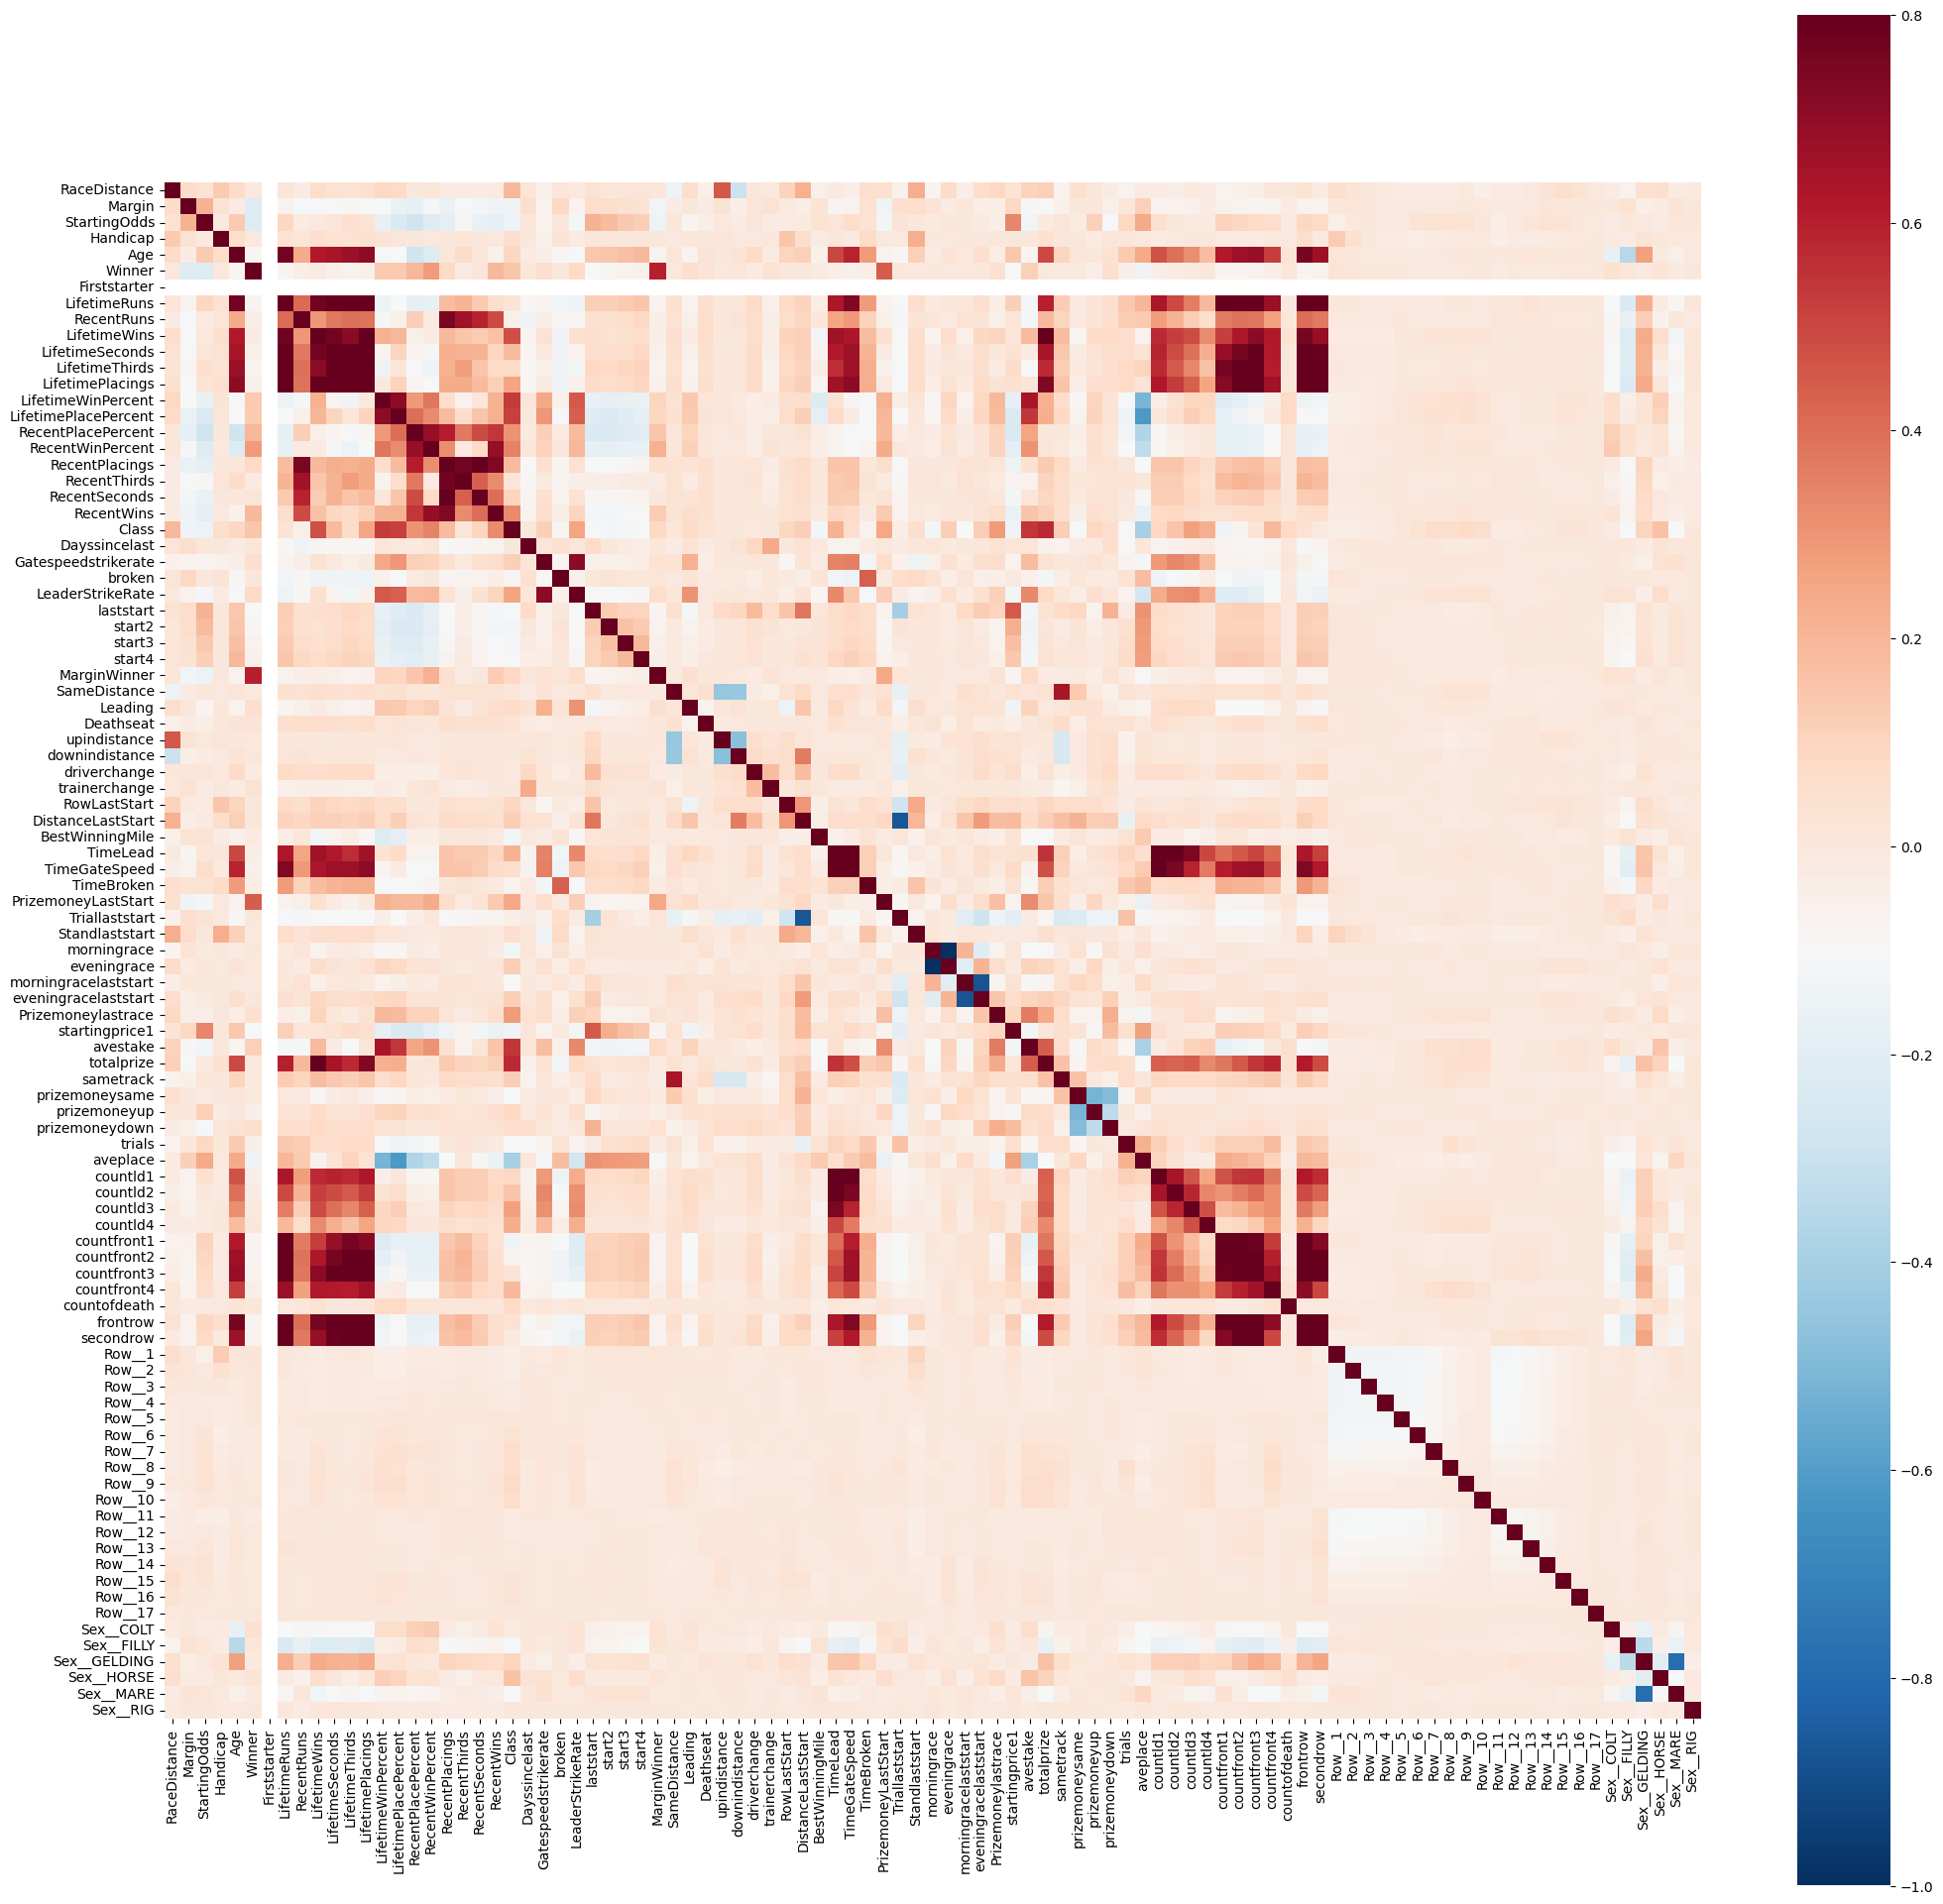

In [9]:
plt.figure(figsize=(25,25), dpi=100)
sns.heatmap(horses.corr(), annot=False, cmap='RdBu_r', vmax=.8, square=True, cbar=True,)
plt.show()

In [10]:
horses.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144917 entries, 0 to 144916
Data columns (total 95 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   RaceDistance          144917 non-null  int64  
 1   Margin                144917 non-null  float64
 2   StartingOdds          144917 non-null  float64
 3   Handicap              144917 non-null  int64  
 4   Age                   144917 non-null  int64  
 5   Winner                144917 non-null  int64  
 6   Firststarter          144917 non-null  int64  
 7   LifetimeRuns          144917 non-null  int64  
 8   RecentRuns            144917 non-null  int64  
 9   LifetimeWins          144917 non-null  int64  
 10  LifetimeSeconds       144917 non-null  int64  
 11  LifetimeThirds        144917 non-null  int64  
 12  LifetimePlacings      144917 non-null  int64  
 13  LifetimeWinPercent    144917 non-null  float64
 14  LifetimePlacePercent  144917 non-null  float64
 15  

/var/folders/wg/0kpf4bq56tn3zqg0vq6863980000gn/T/ipykernel_70772/3900846595.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  horses.info(verbose=True, null_counts=True)


In [11]:
horses.head()

,RaceDistance,Margin,StartingOdds,Handicap,Age,Winner,Firststarter,LifetimeRuns,RecentRuns,LifetimeWins,LifetimeSeconds,LifetimeThirds,LifetimePlacings,LifetimeWinPercent,LifetimePlacePercent,RecentPlacePercent,RecentWinPercent,RecentPlacings,RecentThirds,RecentSeconds,RecentWins,Class,Dayssincelast,Gatespeedstrikerate,broken,LeaderStrikeRate,laststart,start2,start3,start4,MarginWinner,SameDistance,Leading,Deathseat,upindistance,downindistance,driverchange,trainerchange,RowLastStart,DistanceLastStart,BestWinningMile,TimeLead,TimeGateSpeed,TimeBroken,PrizemoneyLastStart,Triallaststart,Standlaststart,morningrace,eveningrace,morningracelaststart,eveningracelaststart,Prizemoneylastrace,startingprice1,avestake,totalprize,sametrack,prizemoneysame,prizemoneyup,prizemoneydown,trials,aveplace,countld1,countld2,countld3,countld4,countfront1,countfront2,countfront3,countfront4,countofdeath,frontrow,secondrow,Row__1,Row__2,Row__3,Row__4,Row__5,Row__6,Row__7,Row__8,Row__9,Row__10,Row__11,Row__12,Row__13,Row__14,Row__15,Row__16,Row__17,Sex__COLT,Sex__FILLY,Sex__GELDING,Sex__HORSE,Sex__MARE,Sex__RIG
0,2265,103.8,91.0,0,6,0,0,14,26,0,1,2,3,0.000000,0.214286,0.192308,0.038462,5,1,3,1,50,4,0.071429,0.071429,0.000000,8,10,4,6,0.0,0,1,0,1,0,0,0,4.0,2242,3252000.0,0,1,1,100,0,0,0,1,0,1,7500,52.70,206.500000,2891,0,1,0,0,9,6.428571,0,0,0,0,1,1,2,0,0,11,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2265,24.2,16.0,0,5,0,0,27,12,5,4,3,12,0.185185,0.444444,0.500000,0.166667,6,2,2,2,75,201,0.555556,0.000000,0.370370,8,2,1,4,0.0,0,0,0,1,0,1,0,3.0,2185,3252000.0,10,15,0,263,0,0,0,1,1,0,6000,2.75,1164.481481,31441,0,0,1,0,2,3.777778,5,3,1,0,2,4,5,0,0,20,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2265,96.2,61.0,0,8,0,0,52,2,8,5,2,15,0.153846,0.288462,0.000000,0.000000,0,0,0,0,50,6,0.288462,0.038462,0.192308,0,2,0,1,0.0,0,0,0,0,0,0,0,0.0,0,3252000.0,10,15,2,0,1,0,0,1,0,0,0,0.00,713.423077,37098,0,0,0,0,23,5.288462,8,2,0,0,9,10,5,3,1,41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1660,0.0,6.5,0,6,1,0,37,10,10,7,3,20,0.270270,0.540541,0.200000,0.100000,2,0,1,1,87,10,0.108108,0.081081,0.054054,1,1,2,7,1.7,0,0,1,0,1,1,0,4.0,2280,3282000.0,2,4,3,7818,0,0,1,0,0,1,11999,4.80,2454.162162,90804,0,0,1,0,12,3.837838,1,1,0,0,4,11,8,5,0,36,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2138,3.9,9.0,0,9,0,0,46,4,6,9,1,16,0.130435,0.347826,0.000000,0.000000,0,0,0,0,83,7,0.260870,0.000000,0.173913,2,4,7,8,0.0,0,1,0,1,0,0,0,3.0,1660,3492000.0,8,12,0,120,0,0,0,1,0,1,8280,71.00,1932.260870,88884,1,0,1,0,3,4.717391,2,3,3,0,2,5,5,7,1,37,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
x = horses.drop(['Winner'], axis=1)
y = horses['Winner']
x = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
tr = DecisionTreeRegressor().fit(x_train, y_train)
print(f'Decision Tree: {tr.score(x_test, y_test)*100}%')

Decision Tree: 99.36087033125413%


In [14]:
lr = LogisticRegression(solver='newton-cg').fit(x_train, y_train)
print(f'Logistic Regression: {lr.score(x_test, y_test)*100}%')

Logistic Regression: 98.7510350538228%


In [15]:
svm = SVC(kernel='rbf').fit(x_train, y_train)
print(f'SVM: {svm.score(x_test, y_test)*100}%')

SVM: 99.26511178581286%
